In [1]:
import tensorflow as tf
import numpy as np

In [2]:
a = 2
b = 3
x = tf.add(a,b,name='x')
y = tf.multiply(a,b,name='y')
useless = tf.multiply(a,x,name='u')
z = tf.pow(y,x,name='z')
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    print(sess.run(z))

sess.close()

7776


In [3]:
""" Simple linear regression example in TensorFlow
This program tries to predict the number of thefts from 
the number of fire in the city of Chicago
Author: Chip Huyen
Prepared for the class CS 20SI: "TensorFlow for Deep Learning Research"
cs20si.stanford.edu
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd

import utils

DATA_FILE = 'data/fire_theft.xls'


In [34]:
# Phase 1: Assemble the graph
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override='utf-8')
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1


# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
# Both have the type float32
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')


# Step 3: create weight and bias, initialized to 0
# name your variables w and b
w = tf.Variable(0.0, name='w', dtype=tf.float32)
b = tf.Variable(0.0, name='b', dtype=tf.float32)


# Step 4: predict Y (number of theft) from the number of fire
# name your variable Y_predicted
Y_predicted = X * w + b


# Step 5: use the square error as the loss function
# name your variable loss
loss = tf.square(Y - Y_predicted, name="loss")


# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)
 


Epoch 0: 2069.6319333978354
Epoch 1: 2117.0123581953535
Epoch 2: 2092.302723001866
Epoch 3: 2068.5080461938464
Epoch 4: 2045.591184088162
Epoch 5: 2023.5146448101316
Epoch 6: 2002.2447619835536
Epoch 7: 1981.748338803649
Epoch 8: 1961.9944411260742
Epoch 9: 1942.9520116143283
Epoch 10: 1924.5930823644712
Epoch 11: 1906.8898800636332
Epoch 12: 1889.8164505837929
Epoch 13: 1873.347133841543
Epoch 14: 1857.4588400604468
Epoch 15: 1842.1278742424079
Epoch 16: 1827.332495119955
Epoch 17: 1813.0520579712022
Epoch 18: 1799.2660847636982
Epoch 19: 1785.9562132299961
Epoch 20: 1773.1024853109072
Epoch 21: 1760.689129482884
Epoch 22: 1748.6984157081515
Epoch 23: 1737.1138680398553
Epoch 24: 1725.920873066732
Epoch 25: 1715.1046249579008
Epoch 26: 1704.6500954309377
Epoch 27: 1694.5447134910141
Epoch 28: 1684.7746311347667
Epoch 29: 1675.328450968245
Epoch 30: 1666.1935385839038
Epoch 31: 1657.3584002084322
Epoch 32: 1648.8122658529207
Epoch 33: 1640.5440742547091
Epoch 34: 1632.5446836102221
Epo

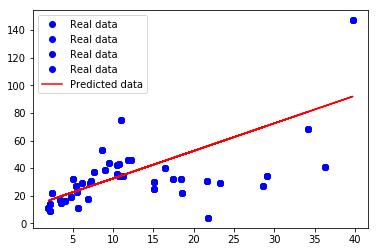

In [35]:
# Phase 2: Train our model
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    # TO - DO
    sess.run(w.initializer)
    sess.run(b.initializer)


    # Step 8: train the model
    for i in range(50): # run 100 epochs
        total_loss = 0
        for x, y in data:
            # Session runs optimizer to minimize loss and fetch the value of loss. Name the received value as l
            # TO DO: write sess.run()
            _,l = sess.run([optimizer, loss], feed_dict={X: x, Y: y})

            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss/n_samples))
        
    w, b = sess.run([w, b])
    
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w + b, 'r', label='Predicted data')
plt.legend()
plt.show()